# Выбор числа кластеров

In [11]:
import pandas as pd
import numpy as np

from sklearn import preprocessing  # методы для предварительной обработки данных (нормирование etc)
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics

In [12]:
data = pd.read_csv('Countries.csv', sep=';', decimal=',')
# Удалим нечисловые переменные
data = data.drop(columns=['Страны'])

# Нормируем данные
data_norm = preprocessing.StandardScaler(with_mean=True, with_std=True).fit_transform(data)
# data_norm = preprocessing.MinMaxScaler().fit_transform(data)
# data_norm = preprocessing.RobustScaler().fit_transform(data)

[Основные метрики](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)
| Метрика |Метод |Критерий|
|-|-|-|
|Silhouette Coefficient|silhouette_score| max|
|Calinski-Harabasz|calinski_harabasz_score|max|
|Davies-Bouldin|davies_bouldin_score|min|
## Метод  k-средних

In [19]:
max_n_clusters = 10

n_clusters = []
metric_silhouette = []
metric_ch = []
metric_db = []

for n in range(2, max_n_clusters+1):
    cluster = KMeans(n_clusters=n, n_init='auto')
    cluster.fit(data_norm)
    n_clusters.append(n)
    metric_silhouette.append(metrics.silhouette_score(data_norm, cluster.labels_))
    metric_ch.append(metrics.calinski_harabasz_score(data_norm, cluster.labels_))
    metric_db.append(metrics.davies_bouldin_score(data_norm, cluster.labels_))
# cluster_metrics = pd.DataFrame({'n_clusters': n_clusters, 'Silhouette':metric_silhouette, 'Calinski-Harabasz':metric_ch, 'Davies-Bouldin':metric_db })
cluster_metrics = pd.DataFrame({'Silhouette':metric_silhouette, 'Calinski-Harabasz':metric_ch, 'Davies-Bouldin':metric_db })
cluster_metrics.index = n_clusters
cluster_metrics

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

,Silhouette,Calinski-Harabasz,Davies-Bouldin
2,0.265892,21.329094,1.435696
3,0.237129,16.802057,1.437023
4,0.287988,17.518533,1.150254
5,0.321957,22.384904,1.032828
6,0.314913,18.435622,0.926360
7,0.273938,21.492530,1.009658
8,0.244156,20.137221,1.214308
9,0.218306,22.298841,0.956075
10,0.264680,21.361967,0.917717


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

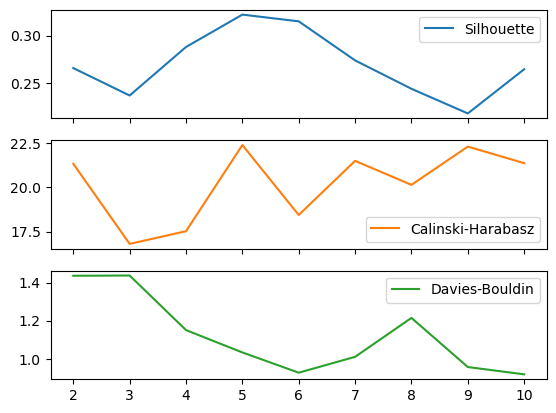

In [20]:
cluster_metrics.plot(subplots=True)

## Иерархическая

In [17]:
max_n_clusters = 10

n_clusters = []
metric_silhouette = []
metric_ch = []
metric_db = []

for n in range(2, max_n_clusters+1):
    cluster = AgglomerativeClustering(n_clusters=n, metric='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=None)
    cluster.fit(data_norm)
    n_clusters.append(n)
    metric_silhouette.append(metrics.silhouette_score(data_norm, cluster.labels_))
    metric_ch.append(metrics.calinski_harabasz_score(data_norm, cluster.labels_))
    metric_db.append(metrics.davies_bouldin_score(data_norm, cluster.labels_))
# cluster_metrics = pd.DataFrame({'n_clusters': n_clusters, 'Silhouette':metric_silhouette, 'Calinski-Harabasz':metric_ch, 'Davies-Bouldin':metric_db })
cluster_metrics = pd.DataFrame({'Silhouette':metric_silhouette, 'Calinski-Harabasz':metric_ch, 'Davies-Bouldin':metric_db })
cluster_metrics.index = n_clusters
cluster_metrics

,Silhouette,Calinski-Harabasz,Davies-Bouldin
2,0.266916,21.193197,1.430487
3,0.271442,19.323843,1.137882
4,0.307059,21.108978,0.965907
5,0.325298,22.358999,1.044144
6,0.341305,23.930778,0.880673
7,0.362741,25.761818,0.796306
8,0.342143,24.972994,0.783118
9,0.319465,24.725839,0.908219
10,0.313254,23.730545,0.878564


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

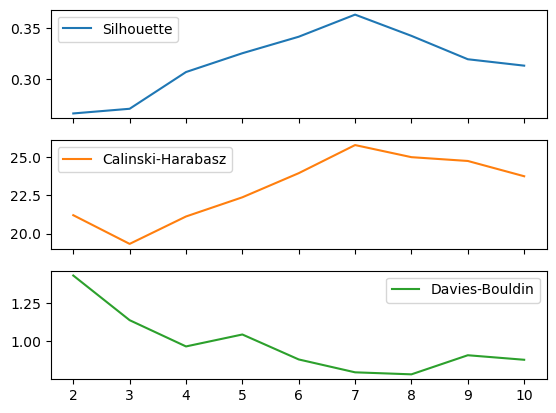

In [18]:
cluster_metrics.plot(subplots=True)